In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import joblib
import os
import re
import json
from tqdm import tqdm_notebook
import gensim
import pymorphy2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [3]:
DIR_PATH = '/Users/anton.andreytsev/Desktop/Avito_catagory_classification/'

–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [46]:
dat = pd.read_csv(os.path.join(DIR_PATH, 'avito_train.csv'))
cat_descr = pd.read_csv(os.path.join(DIR_PATH, 'avito_category.csv'))
dat['category_name'] = dat.category_id.map(dict(zip(cat_descr.category_id, cat_descr.name)))

In [47]:
dat.head()

item_id                                              title  \
0        0                                            –ö–∞—Ä—Ç–∏–Ω–∞   
1        1                        –°—Ç—É–ª—å—è –∏–∑ –ø—Ä–µ—Å—Å–æ–≤–∞–Ω–Ω–æ–π –∫–æ–∂–∏   
2        2                                 –î–æ–º–∞—à–Ω—è—è –º–∏–Ω–∏ –±–∞–Ω—è   
3        3  –≠–∫—Å–∫–ª—é–∑–∏–≤–Ω–∞—è –∫–æ–ª–ª–µ–∫—Ü–∏—è –∫–Ω–∏–≥ "–¢—Ä–∞–Ω—Å–∞—ç—Ä–æ" + –ø–æ–¥–∞—Ä–æ–∫   
4        4                                       –ù–æ—É—Ç–±—É–∫ aser   

                                         description    price  category_id  \
0                         –ì–æ–±–µ–ª–µ–Ω. –†–∞–∑–º–µ—Ä—ã 139—Ö84—Å–º.   1000.0           19   
1  –ü—Ä–æ–¥–∞–º –Ω–µ–¥–æ—Ä–æ–≥–æ 4 —Å—Ç—É–ª–∞ –∏–∑ —Å–≤–µ—Ç–ª–æ–π –ø—Ä–µ—Å—Å–æ–≤–∞–Ω–Ω–æ...   1250.0           22   
2  –ú–∏–Ω–∏ –±–∞–Ω—è –ú–ë-1(–º–∏–Ω–∏ —Å–∞—É–Ω–∞), –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω–∞ –¥–ª—è ...  13000.0           37   
3  –ü—Ä–æ–¥–∞–º —ç–∫—Å–∫–ª—é–∑–∏–≤–Ω—É—é –∫–æ–ª–ª–µ–∫—Ü–∏—é –∫–Ω–∏–≥, –≤—ã–ø—É—â–µ–Ω–Ω—É—é...   4000.0           43   
4  –ü—Ä–æ–¥–∞—ë—Ç—Å—è –Ω–æ—É—Ç–±—É–∫ ACER e5-511C2TA. –ö—É–ø–ª–µ–Ω –≤ –∫–æ...  19000.0            1   

                                       category_name  
0  –î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏|–ú–µ–±–µ–ª—å –∏ –∏–Ω—Ç–µ—Ä—å–µ—Ä|–ü—Ä–µ–¥–º–µ—Ç—ã –∏–Ω—Ç...  
1   –î–ª—è –¥–æ–º–∞ –∏ –¥–∞—á–∏|–ú–µ–±–µ–ª—å –∏ –∏–Ω—Ç–µ—Ä—å–µ—Ä|–°—Ç–æ–ª—ã –∏ —Å—Ç—É–ª—å—è  
2  –õ–∏—á–Ω—ã–µ –≤–µ—â–∏|–ö—Ä–∞—Å–æ—Ç–∞ –∏ –∑–¥–æ—Ä–æ–≤—å–µ|–ü—Ä–∏–±–æ—Ä—ã –∏ –∞–∫—Å–µ—Å...  
3                –•–æ–±–±–∏ –∏ –æ—Ç–¥—ã—Ö|–ö–Ω–∏–≥–∏ –∏ –∂—É—Ä–Ω–∞–ª—ã|–ö–Ω–∏–≥–∏  
4                       –ë—ã—Ç–æ–≤–∞—è —ç–ª–µ–∫—Ç—Ä–æ–Ω–∏–∫–∞|–ù–æ—É—Ç–±—É–∫–∏

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [48]:
# tr_indexes, valid_indexes, te_indexes = np.split(np.arange(dat.shape[0]), [int(np.floor(0.6*dat.shape[0])), int(np.floor(0.6*dat.shape[0])) + 
#                           int(np.floor(0.3*dat.shape[0]))])
# np.save(os.path.join(DIR_PATH, 'train_indexes.npy'), tr_indexes)
# np.save(os.path.join(DIR_PATH, 'valid_indexes.npy'), valid_indexes)
# np.save(os.path.join(DIR_PATH, 'test_indexes.npy'), te_indexes)
tr_indexes = np.load(os.path.join(DIR_PATH, 'train_indexes.npy'))
valid_indexes = np.load(os.path.join(DIR_PATH, 'valid_indexes.npy'))
te_indexes = np.load(os.path.join(DIR_PATH, 'test_indexes.npy'))

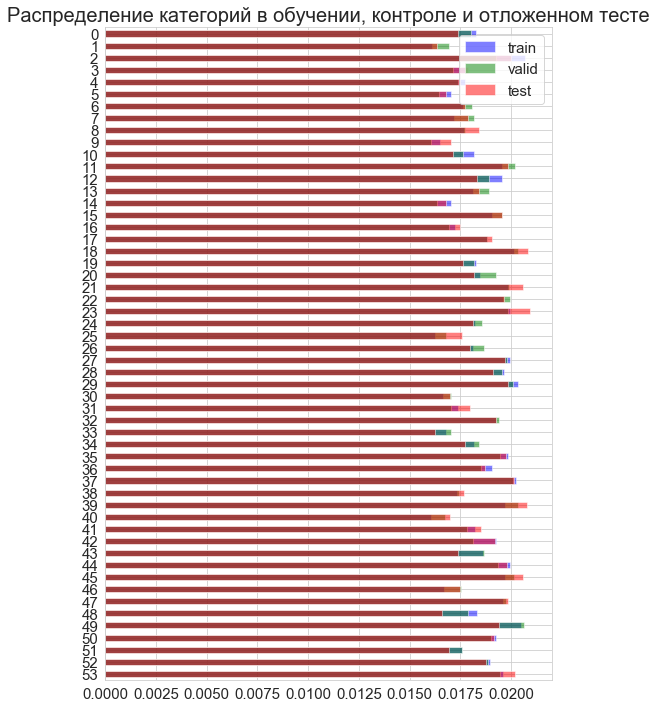

In [49]:
plt.figure(figsize=(8, 12))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –≤ –æ–±—É—á–µ–Ω–∏–∏, –∫–æ–Ω—Ç—Ä–æ–ª–µ –∏ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–º —Ç–µ—Å—Ç–µ', fontsize=20);
dat.category_id[tr_indexes].value_counts(1).sort_index(ascending=False).plot(kind='barh', fontsize=15, color='blue', alpha=0.5, label='train');
dat.category_id[valid_indexes].value_counts(1).sort_index(ascending=False).plot(kind='barh', fontsize=15, color='green', alpha=0.5, label='valid');
dat.category_id[te_indexes].value_counts(1).sort_index(ascending=False).plot(kind='barh', fontsize=15, color='red', alpha=0.5, label='test');
plt.legend(fontsize=15);

–†–∞–∑–æ–±—å—ë–º —Ç–∞—Ä–≥–µ—Ç –Ω–∞ –∏–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Å—ã

In [50]:
# –î–ª–∏–Ω–∞ —Å–∞–º–æ–µ –¥–ª–∏–Ω–Ω–æ–π —Ü–µ–ø–æ—á—Ç–∏ —Ç–∞—Ä–≥–µ—Ç–∞
max_hierarchy_len = np.unique([len(cat_list.split('|')) for cat_list in dat.category_name.values])[-1]
dat['category_1'] = None
dat['category_2'] = None
dat['category_3'] = None
dat['category_4'] = None
splitted_categories = []
for i in tqdm_notebook(range(dat.shape[0])):
    split_categories = dat.category_name[i].split('|')
    splitted_categories.append(split_categories + [None for j in range(max_hierarchy_len - len(split_categories))])
dat[['category_1', 'category_2', 'category_3', 'category_4']] = splitted_categories
del splitted_categories

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫ –ø–æ —É—Ä–æ–≤–Ω—è–º –≤ –æ–±—É—á–µ–Ω–∏–∏, –∫–æ–Ω—Ç—Ä–æ–ª–µ –∏ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–º —Ç–µ—Å—Ç–µ

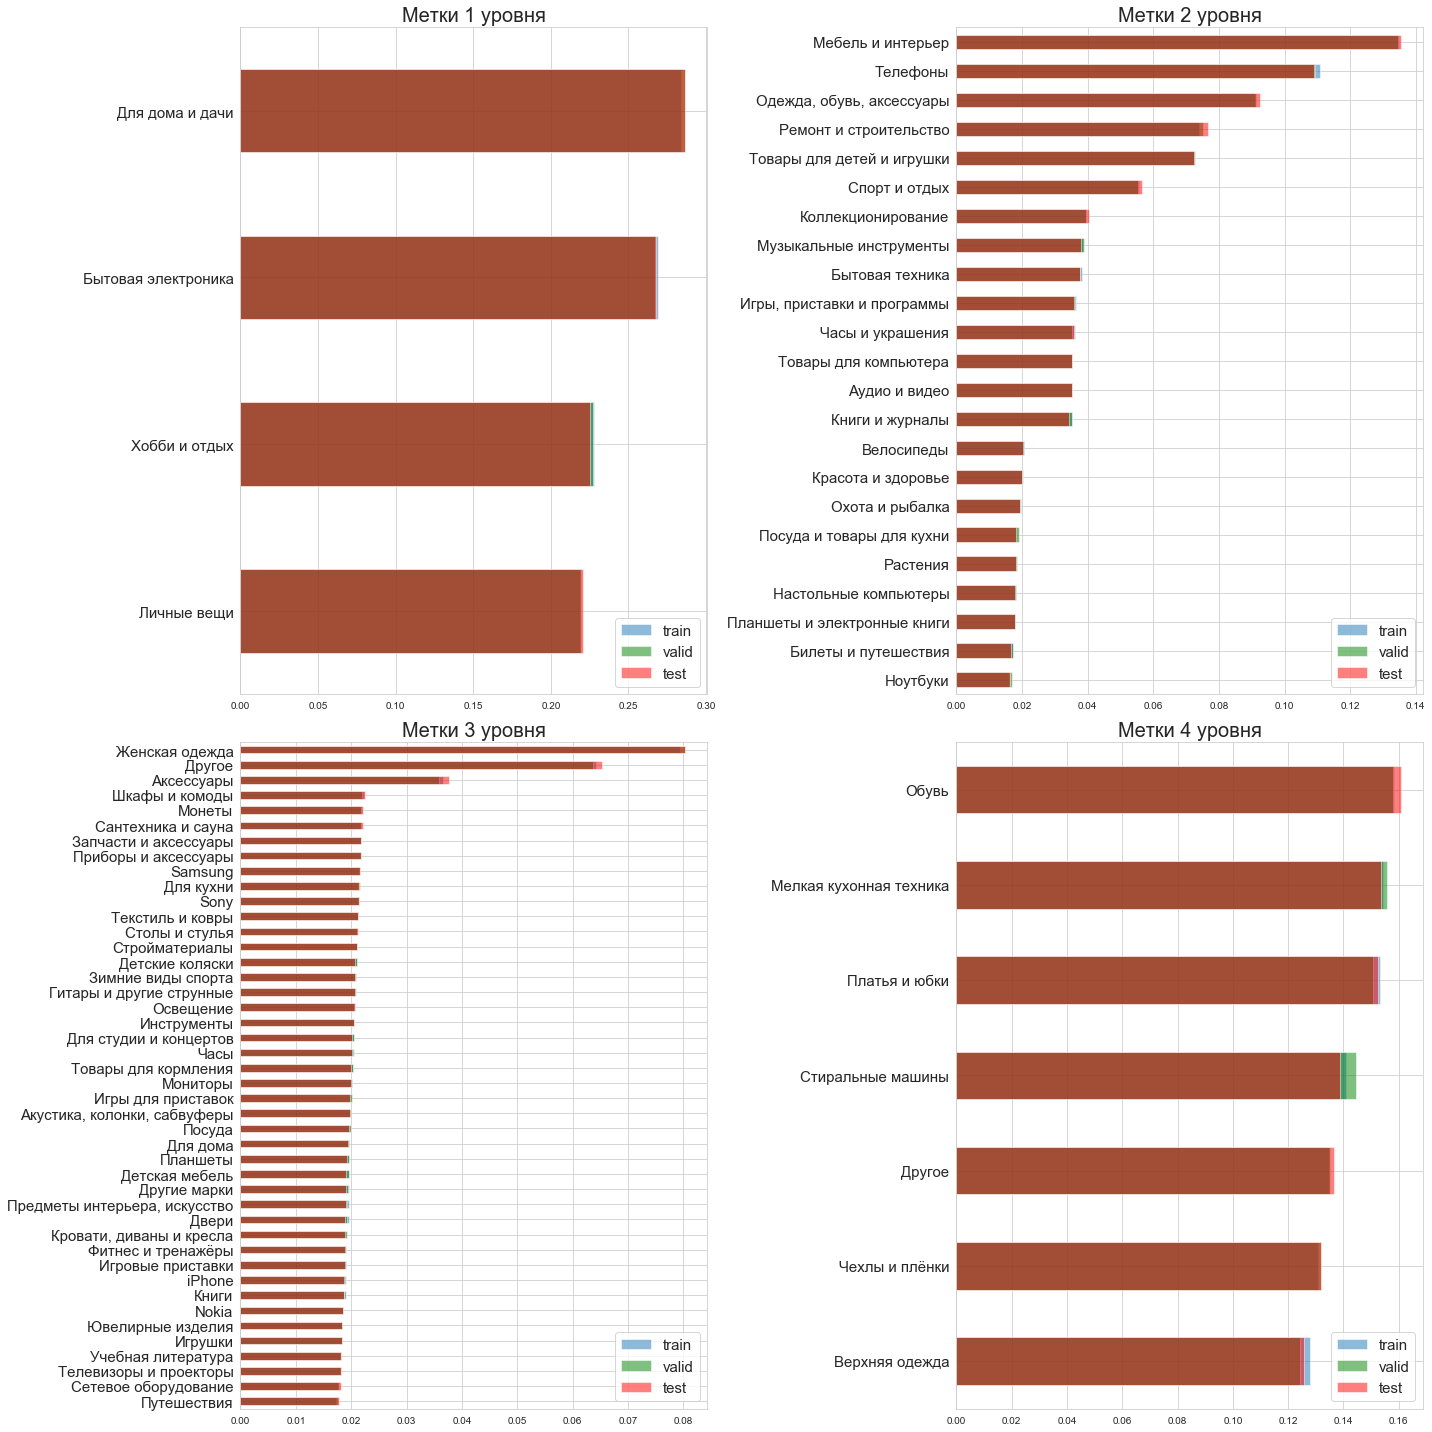

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
k = 1
for (i, j) in itertools.product(range(2), range(2)):
    dat['category_{}'.format(k)][tr_indexes].value_counts(1).sort_values(ascending=True).plot(kind='barh', alpha=0.5, label='train', 
                                                                                              ax=ax[i, j])
    dat['category_{}'.format(k)][valid_indexes].value_counts(1).sort_values(ascending=True).plot(kind='barh', color='green', alpha=0.5, 
                                                                                                 label='valid', ax=ax[i, j])
    dat['category_{}'.format(k)][te_indexes].value_counts(1).sort_values(ascending=True).plot(kind='barh', color='red', alpha=0.5, 
                                                                                              label='test', ax=ax[i, j])
    plt.sca(ax[i, j])
    plt.yticks(fontsize=15);
    plt.legend(fontsize=15);
    plt.title('–ú–µ—Ç–∫–∏ {} —É—Ä–æ–≤–Ω—è'.format(k), fontsize=20);
    fig.tight_layout();
    k += 1

–ó–∞–≥—Ä—É–∑–∏–º —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ø-—Å–ª–æ–≤ https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.json

In [136]:
morph = pymorphy2.MorphAnalyzer()

In [345]:
stop_words_set = set(json.load(open(os.path.join(DIR_PATH, 'stopwords-ru.json'), mode='r', encoding='utf-8')))
stop_words_lemm_set = set()
for word in stop_words_set:
    lemm_word = morph.parse(word)[0].normal_form
    if lemm_word not in stop_words_lemm_set:
        stop_words_lemm_set = stop_words_lemm_set.union([lemm_word])
stop_words_lemm_set = stop_words_lemm_set.union(['–ø—Ä–æ–¥–∞—Ç—å', "–∫—É–ø–∏—Ç—å", "—Å–∫–∏–¥–∫–∞", "–≤—ã–≥–æ–¥–Ω–æ", "–ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ", "–ø–æ–¥—Ä–æ–±–Ω–æ—Å—Ç—å", "—Ç–µ–ª–µ—Ñ–æ–Ω", 
                                                 "–Ω–µ–¥–æ—Ä–æ–≥–æ", '—Å–æ—Å—Ç–æ—è–Ω–∏–µ', '—Ä–∞–∑–º–µ—Ä', "—Ä—É–±–ª—å", "–æ—Ç–ª–∏—á–Ω—ã–π", "—Å–∞–Ω—Ç–∏–º–µ—Ç—Ä", "—Ü–µ–Ω–∞", 
                                                "–∫–æ–º–ø–ª–µ–∫—Ç", "–º–º", "—Å–º", "–ø—Ä–æ–¥–∞–≤–∞—Ç—å", "—Ç–æ—Ä–≥", "–¥–æ—Å—Ç–∞–≤–∫–∞", "—Ü–≤–µ—Ç–∞", "–∑–≤–æ–Ω–∏—Ç—å", "–≤–µ—Å", 
                                                 "—Ç–æ–≤–∞—Ä"])

–ü—Ä–∏–º–µ—Ä —Å—Ç–æ–ø-—Å–ª–æ–≤

In [346]:
print(list(stop_words_lemm_set)[:12])

['–≥–ª–∞–≤–Ω—ã–π', '–µ—â—ë', '–≥–¥–µ', '–±–æ–ª—å—à–æ–π', '—Å–∫–∏–¥–∫–∞', '–µ—Å—Ç—å', '–Ω–µ–¥–∞–≤–Ω–æ', '—Å–µ–º–Ω–∞–¥—Ü–∞—Ç—å', '–∑–∞—Ç–µ–º', '–ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å', '–Ω–µ', '–≤–æ–æ–±—â–µ']


–õ–µ–º–º–∞—Ç–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç—ã

In [347]:
dat['title_processed'] = None
dat['description_processed'] = None
title_processed_list = []
regexp_pattern = r'[_,.!><?"@#$%^&*\t():¬ª¬´+-0123456789]'
for i in tqdm_notebook(range(len(dat))):
    sentence = re.sub(regexp_pattern, ' ', dat.title[i].lower()).split()
    current_sentense = ''
    for word in sentence:
        lemm_word = morph.parse(word)[0].normal_form
        if lemm_word not in stop_words_lemm_set:
            current_sentense += ' ' + lemm_word
    title_processed_list.append(current_sentense.strip())
dat.title_processed = title_processed_list
del title_processed_list

description_processed_list = []
for i in tqdm_notebook(range(len(dat))):
    # —É–±–∏—Ä–∞–µ–º –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
    sentence = re.sub(regexp_pattern, ' ', dat.description[i].lower()).split()
    current_sentense = ''
    for word in sentence:
        lemm_word = morph.parse(word)[0].normal_form
        if lemm_word not in stop_words_lemm_set:
            current_sentense += ' ' + lemm_word
    description_processed_list.append(current_sentense.strip())
dat.description_processed = description_processed_list
del description_processed_list


KeyboardInterrupt: 

In [337]:
# %%time
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf = TfidfVectorizer()
# tf_idf.fit(dat.description_processed)

Wall time: 29.1 s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [338]:
word_idf_dict = dict(zip(tf_idf.get_feature_names(), tf_idf.idf_))

In [342]:
word_idf_dict = dict(sorted(word_idf_dict.items(), key=lambda x: x[1], reverse=True))

–ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π w2v –Ω–∞ —Ä—É—Å—Å–∫–æ–π –≤–∏–∫–∏–ø–µ–¥–∏–∏ https://nlpub.mipt.ru/Russian_Distributional_Thesaurus

In [4]:
%%time
w2v_fpath = "/Users/anton.andreytsev/Downloads/tenth.norm-sz500-w7-cb0--min5.w2v"
w2v = gensim.models.KeyedVectors.load_word2vec_format(w2v_fpath, binary=True, unicode_errors='ignore')
w2v.init_sims(replace=True)

Wall time: 3min


In [77]:
dat

item_id                                              title  \
0             0                                            –ö–∞—Ä—Ç–∏–Ω–∞   
1             1                        –°—Ç—É–ª—å—è –∏–∑ –ø—Ä–µ—Å—Å–æ–≤–∞–Ω–Ω–æ–π –∫–æ–∂–∏   
2             2                                 –î–æ–º–∞—à–Ω—è—è –º–∏–Ω–∏ –±–∞–Ω—è   
3             3  –≠–∫—Å–∫–ª—é–∑–∏–≤–Ω–∞—è –∫–æ–ª–ª–µ–∫—Ü–∏—è –∫–Ω–∏–≥ "–¢—Ä–∞–Ω—Å–∞—ç—Ä–æ" + –ø–æ–¥–∞—Ä–æ–∫   
4             4                                       –ù–æ—É—Ç–±—É–∫ aser   
5             5                          –ë–∞—Å –≥–∏—Ç–∞—Ä–∞ invasion bg110   
6             6                  –°–º–µ—Å—å "–ì—Ä—É–¥–Ω–∏—á–æ–∫" –≥. –ó–µ–ª–µ–Ω–æ–¥–æ–ª—å—Å–∫   
7             7                                            G-shock   
8             8       –°–∞–Ω–∞—Ç–æ—Ä–∏–∏ –ë–µ–ª–æ—Ä—É—Å—Å–∏–∏. - "–õ–µ–ø–µ–ª—å—Å–∫–∏–π –≤–æ–µ–Ω–Ω—ã–π"   
9             9                                          –§–æ—Ç–æ—Ö–æ–ª—Å—Ç   
10           10                               –ë–æ—Ç–∏–ª—å–æ–Ω—ã Nando Muzi   
11           11                               –ò–≥—Ä—É—à–∫–∞ playGro, –õ–µ–≤   
12           12                              –ö—Ä–æ–≤–∞—Ç–∫–∞ –¥–ª—è –º–ª–∞–¥–µ–Ω—Ü–∞   
13           13                   –ü—Ä–æ–¥–∞–º —É—Ç—è–∂–µ–ª–∏—Ç–µ–ª–∏ –ø–æ—è—Å–Ω—ã–µ –Ω–æ–≤—ã–µ   
14           14                              –¶–∏–ª–∏–Ω–¥—Ä–∏—á–µ—Å–∫–∞—è –ª—é—Å—Ç—Ä–∞   
15           15                               –§–∞—Ü–µ–ª–∏—è –ø–∏–∂–º–æ–ª–∏—Å—Ç–Ω–∞—è   
16           16                               –°—Ç–æ–ª –ø–∏—Å—å–º–µ–Ω–Ω—ã–π –ò–∫–µ–∞   
17           17                                             –°—Ç–∞–Ω–æ–∫   
18           18    –ü—Ä–æ–¥–∞–º –∫–æ–ª—è—Å–∫—É Bebecar IP-OP 3–≤1 –ü–æ—Ä—Ç—É–≥–∞–ª–∏—è –±/—É   
19           19                                             –ü–∞–ª—å—Ç–æ   
20           20                                   –ê–ª–º–∞–∑–Ω–∞—è –≤—ã—à–∏–≤–∫–∞   
21           21                                        Spotlight 6   
22           22              –ü—Ä–∏–±–æ—Ä –¥–ª—è –≥–∏–¥—Ä–æ–º–∞—Å—Å–∞–∂–∞ sanitos sls30   
23           23                              –°—Ç–µ–Ω–∫–∞ –¥–ª—è –ø–æ–¥—Ä–æ—Å—Ç–∫–æ–≤   
24           24                               Wi-fi —Ä–æ—É—Ç–µ—Ä TP-link   
25           25                               –ñ–ö —Ç–µ–ª–µ–≤–∏–∑–æ—Ä philips   
26           26                                         Xbox 360 E   
27           27                                  Samsung galaxy s2   
28           28                                            –ü—É—Ö–æ–≤–∏–∫   
29           29                            –°—Ç–æ–ª–æ–≤—ã–µ –ø—Ä–µ–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏   
...         ...                                                ...   
489487   489487  –†–æ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π —Ç—É—Ä –Ω–∞ –¥–µ–Ω—å –°–≤—è—Ç–æ–≥–æ –í–∞–ª–µ–Ω—Ç–∏–Ω–∞ 14...   
489488   489488                             –£—á–µ–±–Ω–∏–∫ –ø–æ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º—É   
489489   489489                              Dexp Ixion M150 Storm   
489490   489490                           –ß–µ—Ö–æ–ª –¥–ª—è –ê–π—Ñ–æ–Ω / iPhone   
489491   489491                                     –î–æ—Å–∫–∞ —Å—É—Ö–∞—è –±—É   
489492   489492                                      –†—É—á–∫–∞ "Iveco"   
489493   489493                  –ó–≤—É–∫–æ–≤–∞—è –∫–∞—Ä—Ç–∞ yamaha Audiogram 3   
489494   489494                                –ö—Ä–æ–≤–∞—Ç—å –¥–≤—É—Å–ø–∞–ª—å–Ω–∞—è   
489495   489495                –ù–æ–≤–∞—è –Ω–µ—Ä–∂ –∫–∞—Å—Ç—Ä—é–ª—è —Å –∫—Ä—ã—à –Ω–∞ 4.5 –ª   
489496   489496                    –ú–µ—Ç–∞–ª–ª–æ–∏—Å–∫–∞—Ç–µ–ª—å Garrett Ace-250   
489497   489497        Samsung A3 duos 4G LTE –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏   
489498   489498                       –ú–æ–Ω–∏—Ç–æ—Ä LG Flatron 17" F720P   
489499   489499            –ù–æ–≤–∞—è –Ω–∞—Å—Ç–æ–ª—å–Ω–∞—è –ª–∞–º–ø–∞ –∏–∑ —Å–µ—Ä–∏–∏ –ü–∞–ª–µ—Ä–º–æ   
489500   489500                                –ö–æ–ª—è—Å–∫–∞ jetem prizm   
489501   489501                                   Samsung U28D590D   
489502   489502                       LG L70 –∏ samsun